In [239]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [240]:
df = pd.read_csv('../resources/NBA_season1718_salary.csv')

In [241]:
df.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [242]:
df.tail()

,Unnamed: 0,Player,Tm,season17_18
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0
572,573,Jarell Eddie,CHI,17224.0


In [243]:
del df['Unnamed: 0']

In [244]:
df.head()

,Player,Tm,season17_18
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


In [245]:
df = df[df['season17_18'] < max(df['season17_18'])]

In [246]:
df_rename = df.rename(columns={'Tm': 'Team', 'season17_18': "'17-'18 Season Pay"})

In [247]:
team_lower = df_rename['Team'].apply(lambda x: x.upper())
sal_hundereds = df_rename["'17-'18 Season Pay"].apply(lambda x: int(x))
player_names = df_rename['Player'].apply(lambda x: x.title())

In [248]:
new_df = pd.DataFrame({
    'Player Name': player_names,
    'Team Name': team_lower,
    'Salary': sal_hundereds
})

In [249]:
new_df.head()

,Player Name,Team Name,Salary
1,Lebron James,CLE,33285709
2,Paul Millsap,DEN,31269231
3,Gordon Hayward,BOS,29727900
4,Blake Griffin,DET,29512900
5,Kyle Lowry,TOR,28703704


In [250]:
new_df['Team Name'].value_counts().head()

ATL    27
CHI    24
DAL    22
LAL    22
MIL    22
Name: Team Name, dtype: int64

In [251]:
top_5_paid = new_df.Salary.nlargest(10)
tick_locs = list(new_df["Player Name"].values[:10])
tick_labels = list(new_df["Player Name"].values[:10])
type(tick_locs)
len(tick_locs)

10

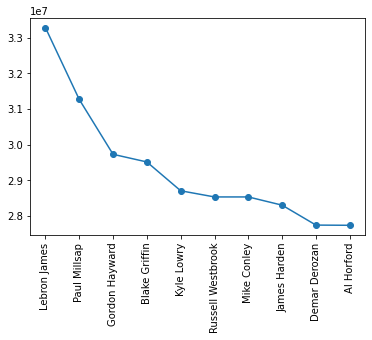

In [252]:
top_5_paid.plot(marker='o')
plt.xticks(np.arange(1, len(tick_locs) + 1), labels=tick_labels, rotation=90);

In [253]:
new_df.describe()

,Salary
count,5.720000e+02
mean,5.808555e+06
std,7.066251e+06
min,1.722400e+04
25%,1.312611e+06
50%,2.376212e+06
75%,7.866752e+06
max,3.328571e+07


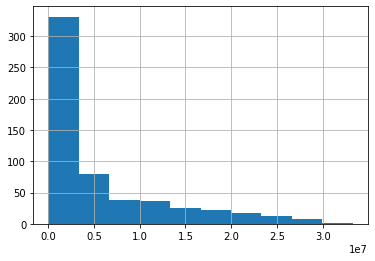

In [254]:
new_df.Salary.hist()

In [255]:
sal_max = new_df.Salary.max()

In [256]:
df_max = sal.max()

In [257]:
normalized_df = new_df.Salary / df_max

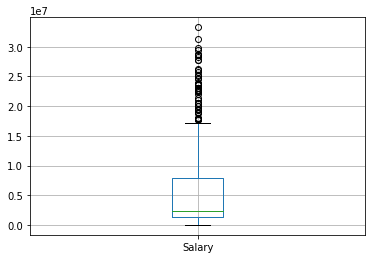

In [258]:
new_df.boxplot(column=['Salary'])

In [259]:
corr = new_df[['Player Name','Team Name']]

graph for Player Name | total= 20


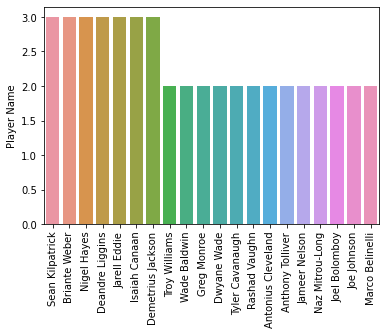

graph for Team Name | total= 20


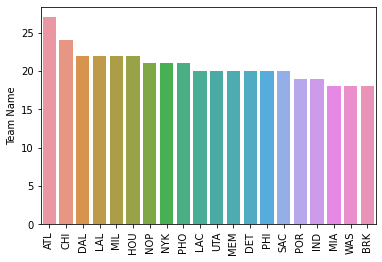

In [260]:
for i in corr.columns:
    x = corr[i].value_counts()[:20]
    print("graph for %s | total= %d" % (i, len(x)))
    chart = sns.barplot(x=x.index, y=x, data=new_df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [261]:
new_df.columns

Index(['Player Name', 'Team Name', 'Salary'], dtype='object')

In [262]:
pd.pivot_table(new_df, index='Team Name', values='Salary').sort_values('Salary', ascending=False)[:5]

,Salary
Team Name,
CLE,9.806325e+06
OKC,8.952937e+06
CHO,8.373440e+06
MIN,7.341785e+06
MIA,7.290146e+06


In [274]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/mason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mason/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

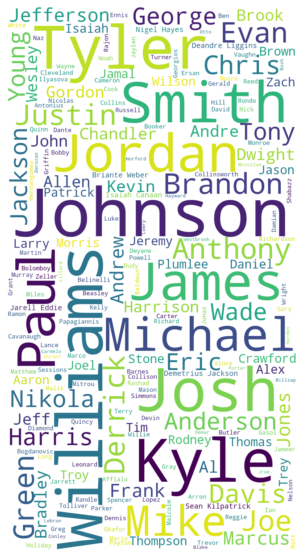

In [296]:
words = " ".join(new_df['Player Name'])

def punc_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punc_stop(words)

text = " ".join([ele for ele in words_filtered])
wc = WordCloud(background_color='white',random_state=1, stopwords=STOPWORDS, max_words=200, width=800, height=1500)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

''